In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Mounting Project Folder



In [ ]:
# @title Mount for Ashwin
# %cd '/content/drive/MyDrive/College Practical Work/SEM 7/NLP/Project'

In [ ]:
# @title Mount for Brendon
# %cd

In [ ]:
# @title Mount for Vendrell
%cd '/content/drive/MyDrive/College Practical Work/SEM 7/NLP/Project'

/content/drive/MyDrive/College Practical Work/SEM 7/NLP/Project


In [ ]:
!ls

bbc-hindi-news.json	   naive_bayes_nlp_v1.pkl	   tfidf_classification_vashwin.pkl
gargi.ttf		   naive_bayes_nlp_vashwin.pkl	   tfidf_classification_vashwin_v2.pkl
Hand_Scrapped		   naive_bayes_nlp_vashwin-v2.pkl  tfidf_classification_vashwin_v3.pkl
hindi_stop_words.txt	   naive_bayes_nlp_vashwin-v3.pkl  webscrapped.csv
hindi-test.csv		   random_forest_model.pkl	   webscrappedv2.csv
hindi-test.gsheet	   rf_textclass.pkl		   webscrapped_v3.csv
hindi-train.csv		   tfidf_classification_final.pkl
naive_bayes_nlp_final.pkl  tfidf_classification.pkl


# 1. Loading Dataset

In [ ]:
# df_train = pd.read_csv('hindi-train.csv', sep="\t", encoding='utf-8', header=None)
# df_test = pd.read_csv('hindi-test.csv', sep="\t", encoding='utf-8', header=None)
# column_names = ['classname','heading']
# df_train2 = pd.read_csv('hindi-train.csv', sep="\t", encoding='utf-8', header=None,names=column_names)
# df_test2 = pd.read_csv('hindi-test.csv', sep="\t", encoding='utf-8', header=None,names=column_names)
# df = pd.concat([df_train2, df_test2], ignore_index=True)
# column_names = ['heading','classname']
df = pd.read_csv('webscrappedv2.csv',encoding='utf-8')
df

,heading,classname
0,पाकिस्तान ज़िंदाबाद' के नारे पर वर्ल्ड कप के म...,Sports
1,एशियन गेम्स में भारत को जैवलिन थ्रो में पहली ब...,Sports
2,विराट कोहली के शतक की क्यों हो रही इतनी चर्चा?,Sports
3,"आठ साल बाद विराट कोहली का वर्ल्ड कप में शतक, भ...",Sports
4,भारत बनाम बांग्लादेशः क्या रोहित का ये बड़ा दा...,Sports
...,...,...
842,कियारा आडवाणी: 'पहले जो कतराते थे अब उन्हीं से...,Entertainment
843,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment
844,बॉक्स ऑफिस पर औंधे मुंह क्यों गिर रही हैं बॉली...,Entertainment
845,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment


In [ ]:
value_counts = df['classname'].value_counts()

# Print the result
print(value_counts)

Technology       239
Entertainment    226
Sports           223
Economy          159
Name: classname, dtype: int64


# 2. Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**2.1 Removing the unwanted chacters and finding total number of words in each sentence.**

In [ ]:
df['heading'] =  [re.sub('\n','', str(x)) for x in df['heading']]
# df['heading'] =  [re.sub(r'[?|$|.|!|।|,|:|;|]','', str(x)) for x in df['heading']]
df['heading'] = [re.sub(r'[?|$|.|!|।|,|:|;|()\[\]\'"]', '', str(x)) for x in df['heading']]
df['heading'] =  [x.strip() for x in df['heading']]
df['totalwords'] = df['heading'].str.split().str.len()
df

,heading,classname,totalwords
0,पाकिस्तान ज़िंदाबाद के नारे पर वर्ल्ड कप के मै...,Sports,12
1,एशियन गेम्स में भारत को जैवलिन थ्रो में पहली ब...,Sports,17
2,विराट कोहली के शतक की क्यों हो रही इतनी चर्चा,Sports,10
3,आठ साल बाद विराट कोहली का वर्ल्ड कप में शतक भा...,Sports,18
4,भारत बनाम बांग्लादेशः क्या रोहित का ये बड़ा दा...,Sports,15
...,...,...,...
842,कियारा आडवाणी पहले जो कतराते थे अब उन्हीं से ऑ...,Entertainment,12
843,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18
844,बॉक्स ऑफिस पर औंधे मुंह क्यों गिर रही हैं बॉली...,Entertainment,13
845,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18


In [ ]:
#  Average number of words in each sentence.
sum=df['totalwords'].sum() # total number of words in all sentences.
n=df['totalwords'].count() # total number of sentences.
aver_words=sum/n
print(aver_words)

16.10625737898465


**Observation** : Average words in each sentence is 16.106

In [ ]:
df

,heading,classname,totalwords
0,पाकिस्तान ज़िंदाबाद के नारे पर वर्ल्ड कप के मै...,Sports,12
1,एशियन गेम्स में भारत को जैवलिन थ्रो में पहली ब...,Sports,17
2,विराट कोहली के शतक की क्यों हो रही इतनी चर्चा,Sports,10
3,आठ साल बाद विराट कोहली का वर्ल्ड कप में शतक भा...,Sports,18
4,भारत बनाम बांग्लादेशः क्या रोहित का ये बड़ा दा...,Sports,15
...,...,...,...
842,कियारा आडवाणी पहले जो कतराते थे अब उन्हीं से ऑ...,Entertainment,12
843,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18
844,बॉक्स ऑफिस पर औंधे मुंह क्यों गिर रही हैं बॉली...,Entertainment,13
845,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18


**2.2 Removing Stop Words**

In [ ]:
# List of stop words
stop_words =  set(open('hindi_stop_words.txt').read().split())
print(stop_words)

{'इसके', 'किया', 'अधिकांश', 'कम', 'हमने', 'हुआ', 'या', 'गयी', 'था', 'किसे', 'जबकि', 'हुए', 'मात्र', 'दोनो', 'तक', 'मै', 'बंद', 'पूरा', 'अत', 'खुद', 'अंदर', 'जरा', 'लेकर', 'वर्ग', 'क्यूंकि', 'कल', 'इसका', 'सारा', 'गये', 'तिन', 'पर', 'ही', 'किसको', 'अधिक', 'वहीं', 'अब', 'करने', 'आज', '\ufeffके', 'ऐसा', 'जिस', '.', 'क्या', 'व', 'क्यों', 'इसी', 'चाहिए', 'तो', 'बनी', 'उनकी', 'जिसमें', 'समान', 'पे', 'जा', 'लिया', 'आगे', ',', 'वाले', 'दो', 'प्रति', 'मेरा', 'समय', 'एक', 'करता', 'जिन्हों', 'इन्हों', 'रखें', 'बिलकुल', 'वह', 'अगर', 'किए', 'उनका', 'अपनी', 'इस', 'को', 'उसके', 'उनको', 'की', 'हुये', 'जितना', 'वहाँ', 'कौन', 'अपना', 'तिस', 'वग़ैरह', 'कितना', 'कुल', 'कहते', 'तुम्हारा', 'गई', 'उसी', 'इनके', 'यही', 'हुई', 'हम', 'दूर', 'बाला', 'ज्यादा', 'होना', 'पूरे', 'स्थान', 'ने', 'किसी', 'तुम', 'करना', 'यहाँ', 'ऊपर', 'माध्यम', 'अपने', 'साथ', 'में', 'उस', 'इन्हें', 'मुझको', 'इनकी', 'कि', 'खिलाफ', 'जाता', 'गए', 'जिससे', 'उसका', 'इत्यादि', '।', 'भीतर', 'बीच', 'किस', 'कब', 'जैसा', 'दिया', 'तथा', 'हूँ', 'भी'

In [ ]:
# Removing stop words from each sentences
df['heading_without_stopwords'] = df['heading'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

,heading,classname,totalwords,heading_without_stopwords
0,पाकिस्तान ज़िंदाबाद के नारे पर वर्ल्ड कप के मै...,Sports,12,पाकिस्तान ज़िंदाबाद नारे वर्ल्ड कप मैच विवाद
1,एशियन गेम्स में भारत को जैवलिन थ्रो में पहली ब...,Sports,17,एशियन गेम्स भारत जैवलिन थ्रो पहली गोल्ड जिताने...
2,विराट कोहली के शतक की क्यों हो रही इतनी चर्चा,Sports,10,विराट कोहली शतक इतनी चर्चा
3,आठ साल बाद विराट कोहली का वर्ल्ड कप में शतक भा...,Sports,18,आठ साल विराट कोहली वर्ल्ड कप शतक भारत बांग्लाद...
4,भारत बनाम बांग्लादेशः क्या रोहित का ये बड़ा दा...,Sports,15,भारत बनाम बांग्लादेशः रोहित दांव टीम इंडिया से...
...,...,...,...,...
842,कियारा आडवाणी पहले जो कतराते थे अब उन्हीं से ऑ...,Entertainment,12,कियारा आडवाणी कतराते ऑफर आते
843,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18,मदर इंडिया सेट लगी आग शुरू नरगिस सुनील दत्त प्...
844,बॉक्स ऑफिस पर औंधे मुंह क्यों गिर रही हैं बॉली...,Entertainment,13,बॉक्स ऑफिस औंधे मुंह गिर बॉलीवुड बड़ी फ़िल्में
845,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18,मदर इंडिया सेट लगी आग शुरू नरगिस सुनील दत्त प्...


**2.3 Removing the unwanted chacters and finding total number of words in each sentence of the heading without stopwords.**


In [ ]:
df['heading_without_stopwords'] =  [re.sub('\n','', str(x)) for x in df['heading_without_stopwords']]
# df['heading'] =  [re.sub(r'[?|$|.|!|।|,|:|;|]','', str(x)) for x in df['heading']]
df['heading_without_stopwords'] = [re.sub(r'[?|$|.|!|।|,|:|;|()\[\]\'"]', '', str(x)) for x in df['heading_without_stopwords']]
df['heading_without_stopwords'] =  [x.strip() for x in df['heading_without_stopwords']]
df['totalwords_without_stopwords'] = df['heading_without_stopwords'].str.split().str.len()

In [ ]:
df

,heading,classname,totalwords,heading_without_stopwords,totalwords_without_stopwords
0,पाकिस्तान ज़िंदाबाद के नारे पर वर्ल्ड कप के मै...,Sports,12,पाकिस्तान ज़िंदाबाद नारे वर्ल्ड कप मैच विवाद,7
1,एशियन गेम्स में भारत को जैवलिन थ्रो में पहली ब...,Sports,17,एशियन गेम्स भारत जैवलिन थ्रो पहली गोल्ड जिताने...,12
2,विराट कोहली के शतक की क्यों हो रही इतनी चर्चा,Sports,10,विराट कोहली शतक इतनी चर्चा,5
3,आठ साल बाद विराट कोहली का वर्ल्ड कप में शतक भा...,Sports,18,आठ साल विराट कोहली वर्ल्ड कप शतक भारत बांग्लाद...,12
4,भारत बनाम बांग्लादेशः क्या रोहित का ये बड़ा दा...,Sports,15,भारत बनाम बांग्लादेशः रोहित दांव टीम इंडिया से...,9
...,...,...,...,...,...
842,कियारा आडवाणी पहले जो कतराते थे अब उन्हीं से ऑ...,Entertainment,12,कियारा आडवाणी कतराते ऑफर आते,5
843,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18,मदर इंडिया सेट लगी आग शुरू नरगिस सुनील दत्त प्...,11
844,बॉक्स ऑफिस पर औंधे मुंह क्यों गिर रही हैं बॉली...,Entertainment,13,बॉक्स ऑफिस औंधे मुंह गिर बॉलीवुड बड़ी फ़िल्में,8
845,मदर इंडिया के सेट पर लगी आग से शुरू हुई थी नरग...,Entertainment,18,मदर इंडिया सेट लगी आग शुरू नरगिस सुनील दत्त प्...,11


**2.4 Words tokenization of all sentences.**

In [ ]:
# Words tokenization of all sentences.
lt = df["heading"].tolist()
joint_words = ' '.join(lt)
tokenized_word=word_tokenize(joint_words)
len(tokenized_word)

13687

In [ ]:
# Words tokenization of all headings without stop words.
lt = df["heading_without_stopwords"].tolist()
joint_words = ' '.join(lt)
tokenized_word_no_stop=word_tokenize(joint_words)
len(tokenized_word_no_stop)

8944

# 3.  Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
import requests

In [ ]:
# @title Importing Hindi Fonts for graph
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"
r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"
with open(font_path, "wb") as fw:
  fw.write(r.content)
font_prop = FontProperties(fname=font_path, size=15)

**3.1 Plotting Frequncy distribution for all tokenize words.**

In [ ]:
# Frequncy distribution for all tokenize words.
fdist = FreqDist(tokenized_word)
# Storing the top ten frequency in variable.
common_word=fdist.most_common(10)
# Converting it into list
common_word= dict(common_word)
print(common_word)

{'के': 459, 'की': 392, 'में': 384, 'का': 271, 'से': 237, 'को': 198, 'पर': 186, 'और': 184, 'ने': 173, 'है': 158}


In [ ]:
# Frequncy distribution for all tokenize words.
fdist = FreqDist(tokenized_word_no_stop)

# Storing the top ten frequency in variable.
common_word_no_stop=fdist.most_common(10)
# Converting it into list
common_word_no_stop= dict(common_word_no_stop)
print(common_word_no_stop)

{'भारत': 99, 'कप': 70, 'जानें': 69, 'नहीं': 61, 'फोन': 59, 'वर्ल्ड': 51, 'पाकिस्तान': 50, 'मिल': 48, 'होगा': 47, 'जानिए': 46}


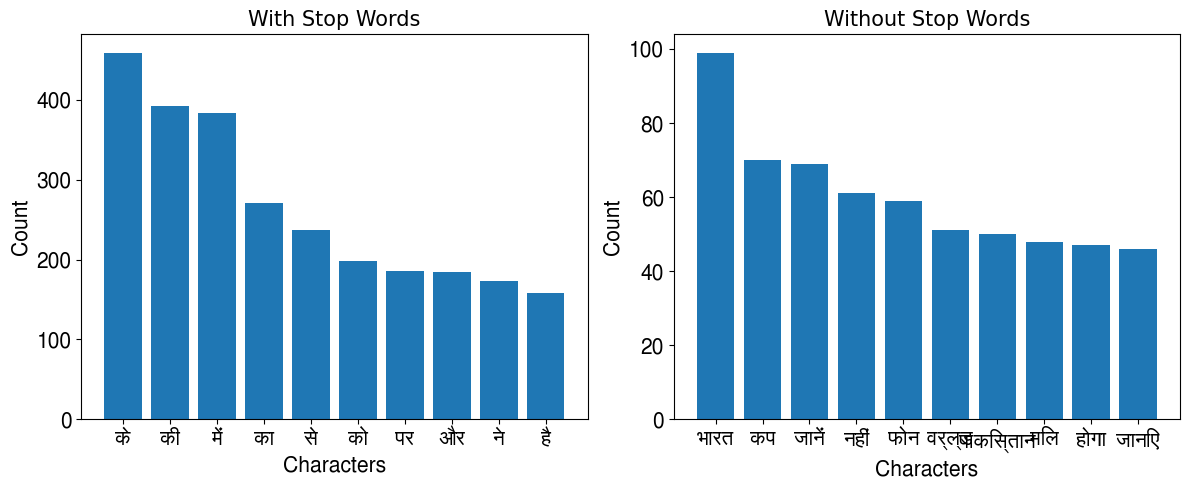

In [ ]:
import matplotlib.pyplot as plt

# Data for the first plot (With Stop Words)
categories_with_stop = list(common_word.keys())
quantities_with_stop = list(common_word.values())

# Data for the second plot (Without Stop Words)
categories_without_stop = list(common_word_no_stop.keys())
quantities_without_stop = list(common_word_no_stop.values())

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first graph (With Stop Words) on the first subplot (ax1)
ax1.bar(categories_with_stop, quantities_with_stop)
ax1.set_title("With Stop Words", size=15)
ax1.set_xlabel("Characters",fontproperties=font_prop)
ax1.set_ylabel("Count",fontproperties=font_prop)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontproperties(font_prop)

# Plot the second graph (Without Stop Words) on the second subplot (ax2)
ax2.bar(categories_without_stop, quantities_without_stop)
ax2.set_title("Without Stop Words", size=15)
ax2.set_xlabel("Characters",fontproperties=font_prop)
ax2.set_ylabel("Count",fontproperties=font_prop)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontproperties(font_prop)

plt.tight_layout()

plt.show()


**3.2 Plotting Frequncy distribution for all tokenize characters.**

In [ ]:
# Tokenization of each character.
lst=[character for word in tokenized_word
         for character in word ]
# Frequency distribution for each character.
fdist_char = FreqDist(lst)
# Top ten frequencies .
fdist_char.most_common(10)
# Storing in variable.
p=fdist_char.most_common(10)
# Converting into dictionary.
p= dict(p)
print(p)

{'ा': 4417, 'क': 3505, 'े': 3414, 'र': 3355, 'ी': 2189, '्': 2138, 'न': 2080, 'स': 1990, 'ि': 1889, 'ं': 1847}


In [ ]:
# Tokenization of each character without stop words.
lst=[character for word in tokenized_word_no_stop
         for character in word ]

# Frequency distribution for each character.
fdist_char_no_stop = FreqDist(lst)

# Top ten frequencies .
fdist_char_no_stop.most_common(10)

# Storing in variable.
p_no_stop=fdist_char_no_stop.most_common(10)

# Converting into dictionary.
p_no_stop= dict(p_no_stop)
print(p_no_stop)

{'ा': 3501, 'र': 2626, '्': 1962, 'े': 1739, 'न': 1733, 'ि': 1690, 'ी': 1615, 'ल': 1552, 'स': 1525, 'क': 1504}


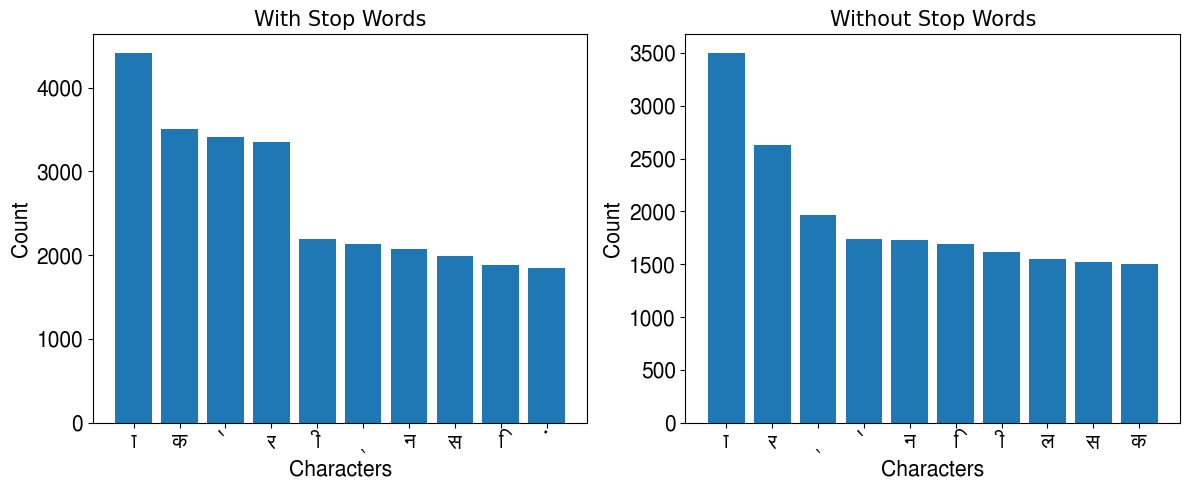

In [ ]:
import matplotlib.pyplot as plt

# Data for the first plot (With Stop Words)
categories_with_stop = list(p.keys())
quantities_with_stop = list(p.values())

# Data for the second plot (Without Stop Words)
categories_without_stop = list(p_no_stop.keys())
quantities_without_stop = list(p_no_stop.values())

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph (With Stop Words) on the first subplot (ax1)
ax1.bar(categories_with_stop, quantities_with_stop)
ax1.set_title("With Stop Words", size=15)
ax1.set_xlabel("Characters", fontproperties=font_prop)
ax1.set_ylabel("Count", fontproperties=font_prop)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontproperties(font_prop)

# Plot the second graph (Without Stop Words) on the second subplot (ax2)
ax2.bar(categories_without_stop, quantities_without_stop)
ax2.set_title("Without Stop Words", size=15)
ax2.set_xlabel("Characters", fontproperties=font_prop)
ax2.set_ylabel("Count", fontproperties=font_prop)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontproperties(font_prop)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()


**3.3 Top TF-IDF Words**

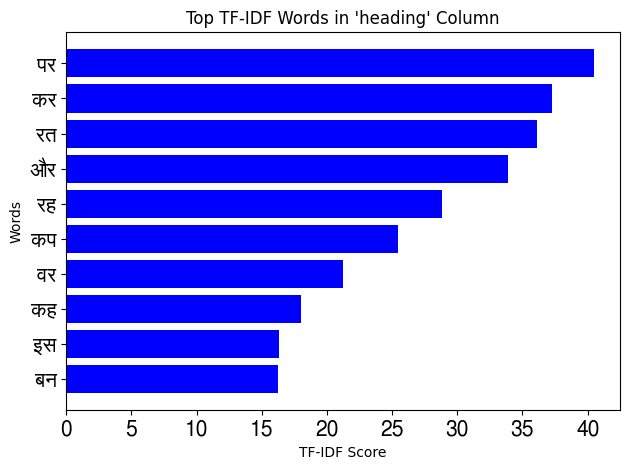

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the 'heading' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['heading'].astype('U'))

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each word
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of word and its corresponding TF-IDF score
word_tfidf = dict(zip(feature_names, tfidf_scores))

# Sort words by their TF-IDF scores in descending order
sorted_word_tfidf = dict(sorted(word_tfidf.items(), key=lambda item: item[1], reverse=True))

# Extract top words and their scores for plotting
top_words = list(sorted_word_tfidf.keys())[:10]
top_scores = list(sorted_word_tfidf.values())[:10]

ax = plt.subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.barh(top_words, top_scores, color='blue')
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top TF-IDF Words in 'heading' Column")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest TF-IDF at the top
plt.tight_layout()

# Show the graph
plt.show()


# 4. Model Building

**4.1 Stemming the headings**

In [ ]:
import re
words_dict  = { "तैराक":"तैर",
                "चालाक":"चाल",
                "कूलाक":"कूल",
                "बेलन":"बेल",
                "मिलाप":"मिल",
                "चुपचाप": "चुप",
                "निकास":"निकस",
                "लुकास":"लुक",
                }
# Define your suffixes, special_suffixes, and other functions here
suffixes = {
	    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
            2: ["तृ","ान","ैत","ने","ाऊ","ाव","कर", "ाओ", "िए", "ाई", "ाए", "नी", "ना", "ते", "ीं", "ती",
                "ता", "ाँ", "ां", "ों", "ें","ीय", "ति","या", "पन", "पा","ित","ीन","लु","यत","वट","लू"],
            3: ["ेरा","त्व","नीय","ौनी","ौवल","ौती","ौता","ापा","वास","हास","काल","पान","न्त","ौना","सार","पोश","नाक",
                "ियल","ैया", "ौटी","ावा","ाहट","िया","हार", "ाकर", "ाइए", "ाईं", "ाया", "ेगी", "वान", "बीन",
                "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं","कला","िमा","कार",
                "गार", "दान","खोर"],
            4: ["ावास","कलाप","हारा","तव्य","वैया", "वाला", "ाएगी", "ाएगा", "ाओगी", "ाओगे",
                "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां",
                "त्वा","तव्य","कल्प","िष्ठ","जादा","क्कड़"],
            5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां", "अक्कड़","तव्य:","निष्ठ"],
}

special_suffixes = ["र्", "ज्य", "त्य"]
dict_special_suffixes = {
    "र्": "ृ",
    "ज्य": "ज्",
    "त्य": "त्"
}

def hi_stem(word, clean=False, chars=None):
    if clean == True:
        word = clean_text(word, chars)

    ans = word
    bl = False

    if word in words_dict.keys():
        return words_dict[word]

    for L in 5, 4, 3, 2, 1:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    ans = word[:-L]
                    bl = True
        if bl == True:
            break

    if bl == True:
        for suf in suffixes[1]:
            if ans.endswith(suf):
                ans = hi_stem(ans)

    for suf in special_suffixes:
        if ans.endswith(suf):
            l = len(suf)
            ans = ans[:-l]
            ans += dict_special_suffixes[suf]

    return ans

def clean_text(text, chars=None):
    if chars == None:
        text = re.sub(r"[()\"#/@;:<>{}`+=~|!?,']", "", text)
    else:
        text = re.sub(r"[" + chars + "()\"#/@;:<>{}`+=~|!?,']", "", text)
    return text

# Create a function to apply hi_stem to the 'heading' column
def stem_hindi_text(text):
    return hi_stem(text, clean=True, chars=None)

# Load your DataFrame 'df'
# Assuming you have a DataFrame 'df' with a 'heading' column

# Apply the stemming function to the 'heading' column and create a new column 'stemmed_heading'
df['stemmed_headings'] = df['heading'].apply(stem_hindi_text)

**4.2 Encodeing the classname to labels**

In [ ]:
from sklearn import preprocessing

Encoder = preprocessing.LabelEncoder()
df['classname_encoded'] = Encoder.fit_transform(df['classname'])

# Get unique class labels
unique_labels = df['classname'].unique()

# Print labels and their corresponding encoded values
for label in unique_labels:
    encoded_value = df[df['classname'] == label]['classname_encoded'].values[0]
    print(f"Label: {label}, Encoded Value: {encoded_value}")

Label: Sports, Encoded Value: 2
Label: Technology, Encoded Value: 3
Label: Economy, Encoded Value: 0
Label: Entertainment, Encoded Value: 1


**4.3 Splitting dataset for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

y=df['classname_encoded']
X=df['stemmed_headings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**4.4 Creating TF-IDF Vectors for Text Data Using Scikit-Learn's TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_sentences = df['stemmed_headings'].tolist()
Tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))
Tfidf_vect.fit(all_sentences)
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
# Importing the required libraries
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=1, random_state=101, max_features=None, min_samples_leaf=30)
rfm.fit(X_train_Tfidf, y_train)
predictions_RF = rfm.predict(X_test_Tfidf)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_Tfidf, y_train)
predictions_SVM = svm.predict(X_test_Tfidf)

# Naive Bayes (Multinomial)
nb = MultinomialNB()
nb.fit(X_train_Tfidf, y_train)
predictions_NB = nb.predict(X_test_Tfidf)

# AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=101)
adaboost.fit(X_train_Tfidf, y_train)
predictions_AdaBoost = adaboost.predict(X_test_Tfidf)

# Gradient Boosting classifier
gradboost = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=101)
gradboost.fit(X_train_Tfidf, y_train)
predictions_GradientBoost = gradboost.predict(X_test_Tfidf)

# Evaluate the models
accuracy_RF = accuracy_score(y_test, predictions_RF)
accuracy_SVM = accuracy_score(y_test, predictions_SVM)
accuracy_NB = accuracy_score(y_test, predictions_NB)
accuracy_AdaBoost = accuracy_score(y_test,predictions_AdaBoost)
accuracy_GradientBoost = accuracy_score(y_test, predictions_GradientBoost)

print(f"Random Forest Classifier Accuracy: {accuracy_RF:.2f}")
print(f"SVM Accuracy: {accuracy_SVM:.2f}")
print(f"Naive Bayes Accuracy: {accuracy_NB:.2f}")
print(f"AdaBoost Accuracy: {accuracy_AdaBoost:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_GradientBoost:.2f}")

Random Forest Classifier Accuracy: 0.49
SVM Accuracy: 0.75
Naive Bayes Accuracy: 0.61
AdaBoost Accuracy: 0.58
Gradient Boosting Accuracy: 0.68


**4.5 Saving the model**

In [ ]:
import joblib
filename = 'tfidf_classification_final.pkl'
joblib.dump(Tfidf_vect, filename)
# Save the Random Forest model to a file
joblib.dump(nb, 'naive_bayes_nlp_final.pkl')

['naive_bayes_nlp_final.pkl']

**4.6 Using custom input for prediction**

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
user_input = input("Enter a headline : ")

Enter a headline : जारी युद्ध के बीच इजराइल, गाजा पर संयुक्त राष्ट्र की कार्रवाई के लिए रूस, चीन ने किया वीटो


In [ ]:
input_array = []
input_array.append(user_input)
input_df = pd.DataFrame(input_array)
feature_names = ['heading']
input_df.columns = feature_names
# removing stop words
stop_words =  set(open('hindi_stop_words.txt').read().split())
input_df['heading_without_stopwords'] = input_df['heading'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
words_dict  = { "तैराक":"तैर",
                "चालाक":"चाल",
                "कूलाक":"कूल",
                "बेलन":"बेल",
                "मिलाप":"मिल",
                "चुपचाप": "चुप",
                "निकास":"निकस",
                "लुकास":"लुक",
                }
# Define your suffixes, special_suffixes, and other functions here
suffixes = {
	    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
            2: ["तृ","ान","ैत","ने","ाऊ","ाव","कर", "ाओ", "िए", "ाई", "ाए", "नी", "ना", "ते", "ीं", "ती",
                "ता", "ाँ", "ां", "ों", "ें","ीय", "ति","या", "पन", "पा","ित","ीन","लु","यत","वट","लू"],
            3: ["ेरा","त्व","नीय","ौनी","ौवल","ौती","ौता","ापा","वास","हास","काल","पान","न्त","ौना","सार","पोश","नाक",
                "ियल","ैया", "ौटी","ावा","ाहट","िया","हार", "ाकर", "ाइए", "ाईं", "ाया", "ेगी", "वान", "बीन",
                "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं","कला","िमा","कार",
                "गार", "दान","खोर"],
            4: ["ावास","कलाप","हारा","तव्य","वैया", "वाला", "ाएगी", "ाएगा", "ाओगी", "ाओगे",
                "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां",
                "त्वा","तव्य","कल्प","िष्ठ","जादा","क्कड़"],
            5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां", "अक्कड़","तव्य:","निष्ठ"],
}

special_suffixes = ["र्", "ज्य", "त्य"]
dict_special_suffixes = {
    "र्": "ृ",
    "ज्य": "ज्",
    "त्य": "त्"
}

def hi_stem(word, clean=False, chars=None):
    if clean == True:
        word = clean_text(word, chars)

    ans = word
    bl = False

    if word in words_dict.keys():
        return words_dict[word]

    for L in 5, 4, 3, 2, 1:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    ans = word[:-L]
                    bl = True
        if bl == True:
            break

    if bl == True:
        for suf in suffixes[1]:
            if ans.endswith(suf):
                ans = hi_stem(ans)

    for suf in special_suffixes:
        if ans.endswith(suf):
            l = len(suf)
            ans = ans[:-l]
            ans += dict_special_suffixes[suf]

    return ans

def clean_text(text, chars=None):
    if chars == None:
        text = re.sub(r"[()\"#/@;:<>{}`+=~|!?,']", "", text)
    else:
        text = re.sub(r"[" + chars + "()\"#/@;:<>{}`+=~|!?,']", "", text)
    return text

# Create a function to apply hi_stem to the 'heading' column
def stem_hindi_text(text):
    return hi_stem(text, clean=True, chars=None)

# Load your DataFrame 'df'
# Assuming you have a DataFrame 'df' with a 'heading' column

# Apply the stemming function to the 'heading' column and create a new column 'stemmed_heading'
input_df['stemmed_headings'] = input_df['heading'].apply(stem_hindi_text)

In [ ]:
import joblib
# Load the Random Forest model from the saved file
loaded_model = joblib.load('naive_bayes_nlp_final.pkl')
# Load the TF-IDF vectorizer from the saved file
loaded_tfidf = joblib.load('tfidf_classification_final.pkl')
# Transform new data using the loaded TF-IDF vectorizer
input_df_Tfidf = loaded_tfidf.transform(input_df['stemmed_headings'])

In [ ]:
predictions_nb_input=loaded_model.predict(input_df_Tfidf)
print(predictions_nb_input)

[1]


* Label: Sports, Encoded Value: 2
* Label: Technology, Encoded Value: 3
* Label: Economy, Encoded Value: 0
* Label: Entertainment, Encoded Value: 1